C:\Users\Jatin Shishodia\AppData\Local\Temp\ipykernel_23688\740226176.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


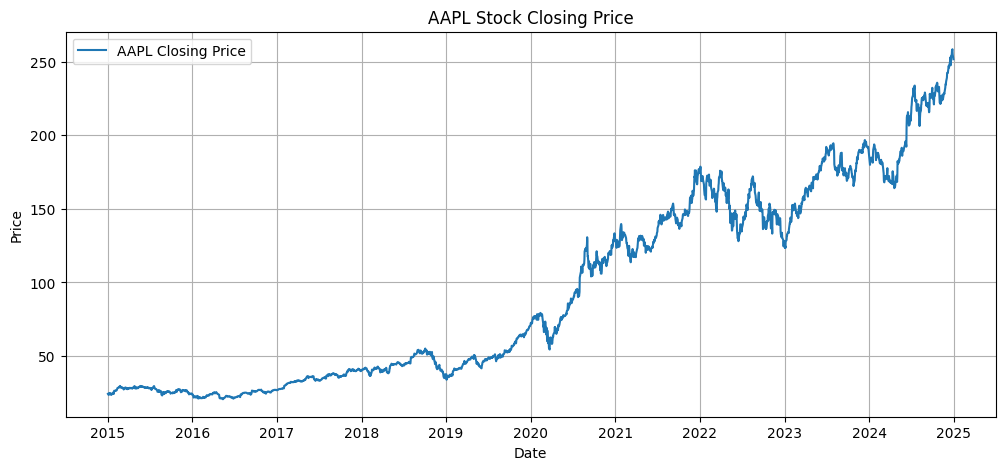

Input shape: (2455, 60, 1), Target shape: (2455, 1)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0143 - val_loss: 8.7527e-04
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.3013e-04 - val_loss: 0.0015
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.8346e-04 - val_loss: 0.0021
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.7002e-04 - val_loss: 0.0029
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5246e-04 - val_loss: 0.0025
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.0754e-04 - val_loss: 0.0025
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.3806e-04 - val_loss: 8.2831e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4779e-04 - val_loss: 0.0019
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1647e-04 - val_loss: 6.4229e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.9728e-04 - val_loss: 9.6996e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.8704e-04 - val_loss: 7.0233e-04
Epo

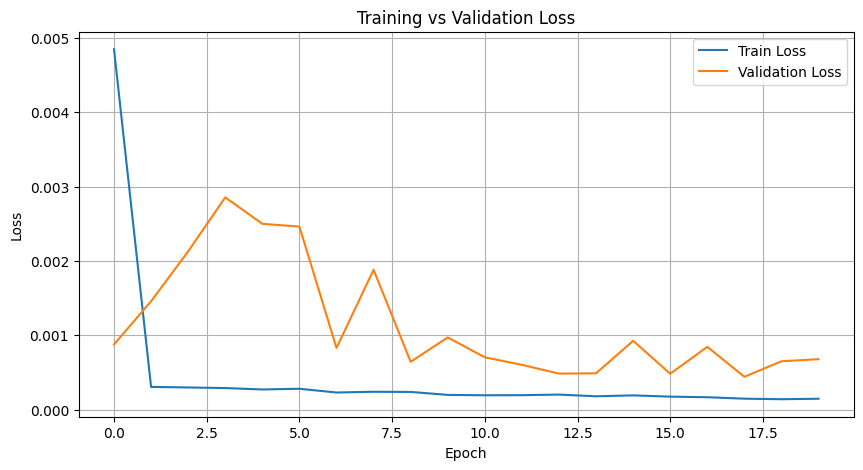

In [7]:
# Step 1: Import Libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Input

# Step 2: Fetch Stock Data
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2024-12-31'

df = yf.download(ticker, start=start_date, end=end_date)
df = df[['Close']]
df.dropna(inplace=True)
df.head()

# Step 3: Visualize Closing Prices
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='AAPL Closing Price')
plt.title(f"{ticker} Stock Closing Price")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig('price_plot.png')
plt.show()

# Step 4: Data Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Step 5: Create Sequences
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)
print(f"Input shape: {X.shape}, Target shape: {y.shape}")

# Step 6: Train-Test Split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 7: Build Initial LSTM Model
model = Sequential([
    Input(shape=(60, 1)),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Step 8: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 9: Plot Training Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_curve.png')
plt.show()
